## Part B

### Q1. Analysing the data - relation between the various features

In [2]:
import csv  
import unicodecsv   # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
import re
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
from nltk.corpus import stopwords
from string import punctuation
# df = pd.DataFrame(fakeClass)

In [3]:
# load data from a file and append it to the rawData
def loadData(path, Text=None):
    with open(path, 'rb') as f:
        reader = unicodecsv.reader(f, encoding='utf-8', delimiter='\t')
        next(reader)
        for line in reader:
            (label, verified, p_category, rating, Text) = parseReview(line)
            rawData.append((label, verified, p_category, rating, Text))
            preprocessedData.append((label, verified, p_category, rating, preProcess(Text)))
       

In [4]:
def parseReview(reviewLine):
    # Should return a triple of an integer, a string containing the review, and a string indicating the label
#     L = []
    label = reviewLine[1]
    if reviewLine[1] == '__label1__':
        label = 'fake'
    else:
        label = 'real'
    verified = reviewLine[3]
    p_category = reviewLine[4]
    rating = reviewLine[2]
    Text = reviewLine[8]
    
    return (label, verified, p_category, rating, Text)

In [13]:
def preProcess(text):
    # word tokenisation
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
    text = re.sub(r"([.,;:!?'\"“\(])(\w)", r"\1 \2", text)
    tokens = re.split(r"\s+",text)
# # #     # normalisation
    new_text = re.sub(r"(\S)\1\1+",r"\1\1\1", text)
    tokens = [t.lower() for t in tokens]
    return tokens
    

In [14]:
rawData = [] 
preprocessedData = []

In [15]:
reviewPath = 'amazon_reviews.txt'

loadData(reviewPath)

In [16]:
print (preprocessedData[:-1][0])

('fake', 'N', 'PC', '4', ['when', 'least', 'you', 'think', 'so', ',', 'this', 'product', 'will', 'save', 'the', 'day', '.', 'just', 'keep', 'it', 'around', 'just', 'in', 'case', 'you', 'need', 'it', 'for', 'something', '.'])


In [17]:
print (len([x[0] for x in rawData if x[0] == "real"]))

10500


In [18]:
print (len([x[0] for x in rawData if x[0] == "fake"]))

10500


In [19]:
# Create a list for fake labels and real labels.
fake_label =[]
real_label = []
for i in range(0, len(preprocessedData)):
    if (rawData[i][0] == 'fake'):
        fake_label.append(preprocessedData[i][3]) 
    else:
        real_label.append(preprocessedData[i][3])

In [20]:
#No. of real labels
len(real_label)

10500

In [21]:
#No. of fake labels
len(fake_label)

10500

In [21]:
# x = []
# y = []

# for i in range(0, len(rawData)):
#     if (rawData[i][0] == 'fake'):
#         x.append(rawData[i][1]) 
#     else:
#         y.append(rawData[i][1])
        
# cate_dict_r = defaultdict(int)
# cate_dict_f= defaultdict(int)

# for c in x:
#     cate_dict_f[c] += 1
    
# for c in y:
#     cate_dict_f[c] += 1

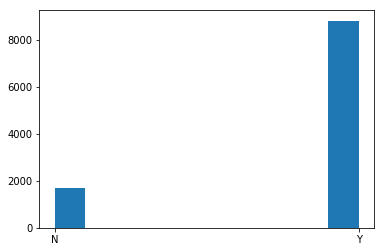

In [29]:
# showing number of real labels are verified or not
import matplotlib.pyplot as plt

plt.hist(real_label)
plt.show()


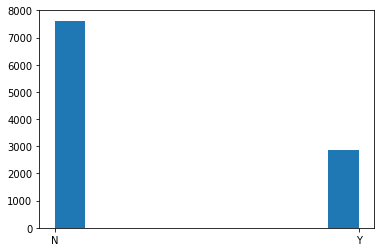

In [30]:
# showing the number of fake labels whether verified or not
import matplotlib.pyplot as plt

plt.hist(fake_label)
plt.show()



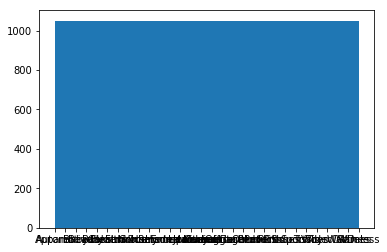

In [33]:
# showing the number of product categories in fake labels
import matplotlib.pyplot as plt

plt.hist(fake_label)
plt.show()

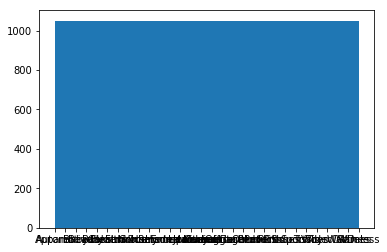

In [34]:
# showing the number of product categories in real labels
import matplotlib.pyplot as plt

plt.hist(real_label)
plt.show()

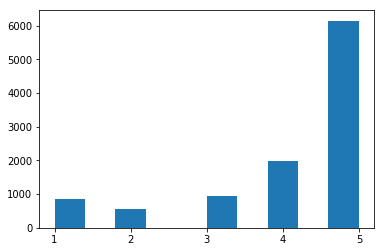

In [22]:
# showing the number of ratings in real labels
import matplotlib.pyplot as plt

plt.hist(real_label)
plt.show()

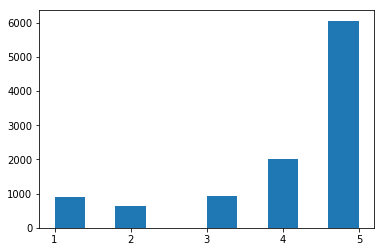

In [23]:
# showing the number of ratings in fake labels
import matplotlib.pyplot as plt

plt.hist(fake_label)
plt.show()